In [95]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [96]:
###############################
# THIS ONLY NEEDS TO RUN ONCE #
###############################

#LOADING TRAINING SET
start = time.time()

#Loading the inputs for the training set
train_inputs_solar = pd.read_csv('..\\data2\\inputs\\inputs_solar.csv')
X = np.array(train_inputs_solar.loc[:,'G_Dh':].values)
area_walls = np.multiply(np.array(train_inputs_solar.loc[:,'perimeter'].values),np.array(train_inputs_solar.loc[:,'height'].values))
train_inputs_solar = None

#Loading the outputs or targets for the training set
train_outputs_solar = pd.read_csv('..\\data2\\energy_demands\\solar_gains.csv')
Y = np.array(train_outputs_solar.loc[:,'Qi(Wh)'].values)
train_outputs_solar = None

end = time.time()
print(str(end-start)+' seconds')

start = time.time()

#Scaling the inputs and outputs (substracting mean and dividing by the standard deviation)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = np.divide(X - X_mean, X_std)

#We use the area of the building walls to normalize the thermal losses (since we know that thermal losses are proportional to this area)
Y = np.divide(Y, area_walls)
Y_mean = Y.mean(axis=0)
Y_std = Y.std(axis=0)
Y = np.divide(Y - Y_mean, Y_std)

end = time.time()
print(str(end-start)+' seconds')

#LOADING THE TEST SET
start = time.time()

test_inputs_solar = pd.read_csv('..\\data2\\inputs\\inputs_solar_testset.csv')
X_test = np.array(test_inputs_solar.loc[:,'G_Dh':].values)
area_walls_test = np.multiply(np.array(test_inputs_solar.loc[:,'perimeter'].values),np.array(test_inputs_solar.loc[:,'height'].values))
test_inputs_solar = None

test_outputs_solar = pd.read_csv('..\\data2\\energy_demands\\solar_gains_testset.csv')
Y_test = np.array(test_outputs_solar.loc[:,'Qi(Wh)'].values)
test_outputs_solar = None

end = time.time()
print(str(end-start)+' seconds')

#SCALING THE TEST SET
X_test = np.divide(X_test - X_mean, X_std)

144.84130024909973 seconds


In [98]:
##################################
# THIS IS THE CODE TO BE CHANGED #
##################################

start = time.time()

#TRAINING THE MACHINE LEARNING REGRESSOR
regr = RandomForestRegressor(max_depth=8, n_estimators=30)
regr.fit(X, Y) 

end = time.time()
train_time = end-start
print(str(train_time)+' seconds')

6076.573611021042 seconds


In [104]:
#We print the importances of the features we used for learning based on the information gain due to each of them (not all the regression algorithms allow this).
print(regr.feature_importances_)

[4.45604952e-02 4.07048644e-01 0.00000000e+00 9.16501915e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.39649877e-01
 0.00000000e+00 1.16261061e-08 0.00000000e+00 0.00000000e+00
 9.56737460e-06 1.56015152e-01 1.52716244e-01]


In [106]:
start = time.time()

#TESTING THE MACHINE LEARNING REGRESSOR
Y_pred = regr.predict(X_test)

end = time.time()
test_time = end-start

#Y_pred is normalized (since the regressor was trained using normalized targets). Now we de-normalize it a de-scale the predictions.
Y_pred = np.multiply(np.multiply(Y_pred, Y_std) + Y_mean, area_walls_test)

print(str(end-start)+' seconds')

11.376349925994873 seconds


In [107]:
#Calculating scores 0.6562254167979638
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)

In [110]:
#Displaying results
print('Results for SOLAR GAINS:')
print('R2: '+str(r2))
print('mse: '+str(mse))
print('mae: '+str(mae))
print('train_time: '+str(train_time))
print('test_time: '+str(test_time))

Results for SOLAR GAINS:
R2: 0.8508176618998957
mse: 154564862.1842542
mae: 2724.112360240349


Text(0, 0.5, 'Solar gains (Wh)')

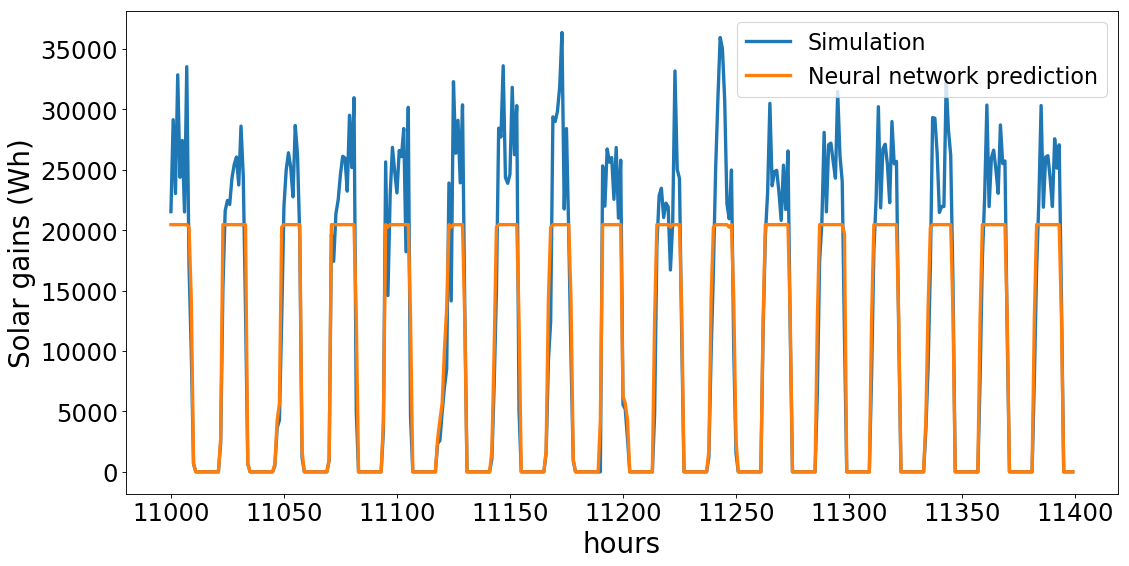

In [115]:
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22)
plt.plot(list(range(11000,11400)), Y_test[11000:11400],linewidth=3.0)
plt.plot(list(range(11000,11400)), Y_pred[11000:11400],linewidth=3.0)
plt.legend(['Simulation','Neural network prediction'], fontsize=20)
plt.xlabel('hours', fontsize=25)
plt.ylabel('Solar gains (Wh)', fontsize=25)

# plt.savefig('solar_gains.png', dpi=600)